# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [50]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
import decimal
%matplotlib inline


In [51]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df = pd.read_csv(url)
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
12912,2020-04-20,Zimbabwe,0,0,25,3
12913,2020-04-21,Zimbabwe,0,0,25,3
12914,2020-04-22,Zimbabwe,3,0,28,3
12915,2020-04-23,Zimbabwe,0,0,28,3


Imprimos los resultados y agregamos el numero del dia


In [52]:
df = df[df['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df = df[(df.total_cases >= 1)]
df = df.loc[:,['date', 'new_cases', 'total_cases']] #Selecciono las columnas de analasis
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

,date,new_cases,total_cases
3474,60,1,1
3475,61,5,6
3476,62,1,7
3477,64,3,10
3478,65,3,13
3479,68,1,14
3480,69,1,15
3481,70,2,17
3482,73,6,23
3483,74,5,28


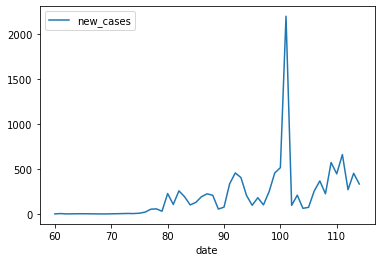

In [53]:
df.plot(x ='date', y='new_cases')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [54]:
filtro = df["new_cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


155.0
223.66


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [55]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
y = list(df_t.iloc [:, 1]) # Total casos
x = list(df_t.iloc [:, 0]) # Dias
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)

11338


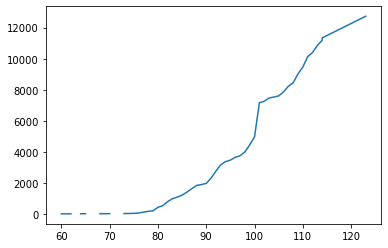

In [56]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
for i in range(x[-1], x[-1]+10):
    x.append(i)
    y.append(int(y[-1] + mediana))
plt.plot(x[61:], y[61:])
plt.show()

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

## 1. Comparar el modelo de predicion matematico vs probabilidad.

[1, 6, 7, 10, 13, 14, 15, 17, 23, 28, 37, 58, 111, 168, 199, 426, 532, 789, 981, 1082, 1211, 1403, 1627, 1835, 1890, 1966, 2302, 2758, 3163, 3368, 3465, 3646, 3747, 3995, 4450, 4965, 7161, 7257, 7466, 7529, 7603, 7858, 8225, 8450, 9022, 9468, 10128, 10398, 10850, 11183, 11338, 11493, 11648, 11803, 11958, 12113, 12268, 12423]
[    1     6     7    10    13    14    15    17    23    28    37    58
   111   168   199   426   532   789   981  1082  1211  1403  1627  1835
  1890  1966  2302  2758  3163  3368  3465  3646  3747  3995  4450  4965
  7161  7257  7466  7529  7603  7858  8225  8450  9022  9468 10128 10398
 10850 11183 11338 11493 11648 11803 11958 12113 12268 12423]


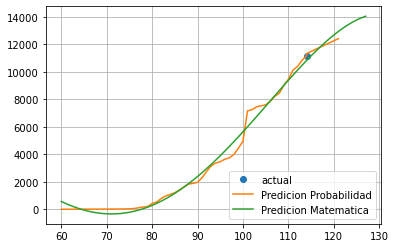

In [58]:
#Implementar
# predicion probabilidad
x = list(df.iloc [:, 0]) # Dias 
y = list(df.iloc [:, 2]) # Total casos
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)

plt.plot(x[-1],y[-1],'o',label='actual')

#predicion a una semana
for i in range(x[-1], x[-1]+8):
    x.append(i)
    y.append(int(y[-1] + mediana))

print(y)    
#predicion matematica 
x1 = np.array(x)
y1 = np.array(y)  
def func_polinomial(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x + 1

popt1, pcov1 = curve_fit(func_polinomial, x1, y1)
pred_x = list(range(min(x1),max(x1)+7))

pred_x = np.array(pred_x, dtype=float)
print(y1) 
#grficamos los dos metodos para analizar


plt.plot(x, y,label='Predicion Probabilidad')
plt.plot(pred_x,func_polinomial(pred_x,*popt1),label='Predicion Matematica')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## 2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.

 beta=0.27070426, gamma=0.01657757


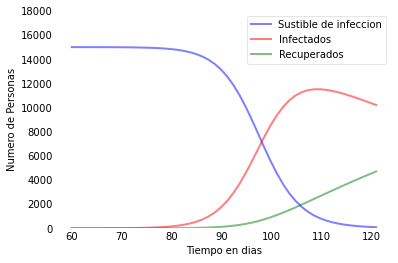

In [11]:

from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint


# los datos estan con una prdicion de una semana.
df2 = pd.DataFrame([x,y])
df2 = df2.transpose()
df2.columns = ('date','total_cases')
data = df2

#Total de la poblacion 15000
N = 15000
# Numero Inicial de Infectados
I0 = 1
# Numero de Recuperados
R0 = 0
# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

def errorCuadratico(point, data, S0, I0, R0):

    size = len(data)
    beta, gamma = point

    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I/N, beta*S*I/N-gamma*I, gamma*I]
    
    solution = solve_ivp(SIR, [0, size], [S0,I0,R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - data)**2))

optimo = minimize(
            errorCuadratico,
            [0.001, 0.001],
            args=(data.total_cases, S0, I0, R0),
            method='L-BFGS-B',
            bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
        )

beta, gamma = optimo.x

print(f" beta={beta:.8f}, gamma={gamma:.8f}")

x3 = list(data.iloc [:, 0])

t = np.linspace(x3[0], x3[-1])

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# Vector de condiciones iniciales
y0 = S0, I0, R0
# Integre las ecuaciones SIR en la cuadrícula de tiempo, t. A traves de la funcion odeint()
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T # Obtenicion de resultados


#  Trace los datos en tres curvas separadas para S (t), I (t) y R (t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='Infectados')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='Recuperados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

## 3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.


8326


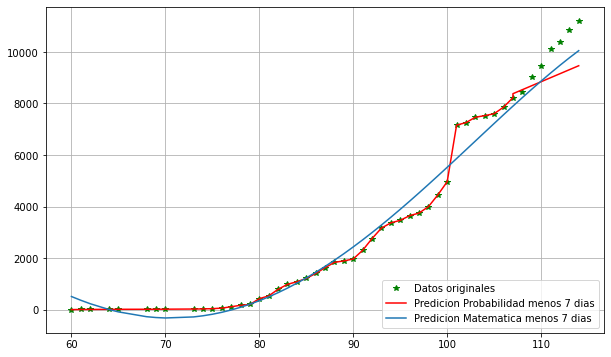

In [48]:
url1 = 'https://covid.ourworldindata.org/data/ecdc/full_data.csv'
df2 = pd.read_csv(url1)

df2 = df2[df2['location'].isin(['Ecuador'])] #Filtro la Informacion solo para Ecuador
df2 = df2[(df2.total_cases >= 1)]
df2 = df2.loc[:,['date', 'new_cases', 'total_cases']] #Selecciono las columnas de analasis
FMT = '%Y-%m-%d'
date = df['date']
df2['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)

data = df2[:-7]

#Modelo probablistico
filtro1 = data["new_cases"] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media1 = filtro1.mean()
mediana1 = filtro1.median()

y1 = list(data.iloc [:, 2]) # Total casos
x1 = list(data.iloc [:, 0]) # Dias

#Realizamos un ejemplo de prediccion
prediccion_siguiente1 = int(y1[-1] + mediana1)
print(prediccion_siguiente1)

for i in range(x1[-1], x1[-1]+8):
    x1.append(i)
    y1.append(int(y1[-1] + mediana))


#modelo matematico
x1 = np.array(x1, dtype=float)
y1 = np.array(y1, dtype=float)
def func_polinomial(x, a, b, c, d):
    return a*x**4 + b*x**3 + c*x**2 + d*x + 1

popt1, pcov1 = curve_fit(func_polinomial, x1, y1)

x2 = df2.date
y2 = df2.total_cases

plt.figure(figsize=(10,6))
plt.plot(x2, y2,'g*',label='Datos originales')
plt.plot(x1, y1,color='r',label='Predicion Probabilidad menos 7 dias')
plt.plot(x1,func_polinomial(x1,*popt1),label='Predicion Matematica menos 7 dias')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Analisis

Mediante la siguiente practica podemos analizar que mediante los dos modelos tanto el matemático como el de probabilidad se puede obtener una predicción casi idéntica, pero el modelo de probabilidad es mucho más fácil de implementar lo que nos permite ahorrar tiempo en el desarrollo de la simulación.  

En el paso dos podemos observar que nuestro SIR con la predicción del modelo de probabilidad nos da resultados muy satisfactorios ya que la representación de infectados disminuye el de recuperados crece lo que nos permite deducir que hay una mejorar en cuanto a la propagación del virus.  

En el puto tres al cargar la información con menos 7 días(día 107) de los datos originales y luego hacer uso de los dos métodos tanto matemático como el de probabilidad y prediciendo 7 días más podemos observar que ambos nos dan una aproximación similar en datos y al comparar y graficar los datos originales se observa que con la proyección se obtiene un número más bajo de infectados en el día 114 que son los que se tiene en la actualidad, el número de infectados es de 11 mil casos pero al predecir con los dos tipos de modelos se obtiene un número más bajo que sería de 9 mil casos aproximadamente.  

Observando esto podríamos decir que los datos proporcionados para la simulación no son del todo confiables y al parecer no están apegados a la realidad por lo que nuestras soluciones de simulación al realizar una tarea correcta la solución no se apega a los datos reales.  


## Conclusiones  

En conclucion mediante la practica se logra tener mayor conocimiento sobre el modelo de probabilidad y el modelo matemático ya que son dos comceptos importante al monmento de trabajer en simulacion para obtener resultados satisfactorios, de igual manera mediante la practica se logra mas conocimiento en el manejo de python ya que eal pracicar con este lenguaje bamos mejorando y el hecho de resolver los problemas planteados en la practica se gana mas experiencia en la programacion.  

## Criterio personal (politico, economico y  social de la situacion)



# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/